In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-05-09.xlsx"
# data = pd.read_excel(data_url, "Data 1", skiprows=2)
dfcovid = pd.read_excel('data_covid/COVID-19-geographic-disbtribution-worldwide-2020-05-25.xlsx')
# dfcovid = pd.read_excel('data_url')



In [3]:
dfcovid['total_cases_to_date'] = dfcovid.apply(lambda row: 
              dfcovid[(dfcovid['geoId'] == row.geoId) 
                      & (dfcovid['dateRep'] <= row.dateRep)]['cases'].sum(), axis = 1) 

dfcovid['total_deaths_to_date'] = dfcovid.apply(lambda row: 
              dfcovid[(dfcovid['geoId'] == row.geoId) 
                      & (dfcovid['dateRep'] <= row.dateRep)]['deaths'].sum(), axis = 1) 

dfcovid['month_day'] = dfcovid.apply(lambda row: str(row.month) + '' + str(row.day), axis = 1) 

In [4]:
dfcovid_singapore = dfcovid[(dfcovid['countriesAndTerritories'] == 'Singapore') & 
                           (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_southkorea = dfcovid[(dfcovid['countriesAndTerritories'] == 'South_Korea') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_norway = dfcovid[(dfcovid['countriesAndTerritories'] == 'Norway') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_indonesia = dfcovid[(dfcovid['countriesAndTerritories'] == 'Indonesia') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_uk = dfcovid[(dfcovid['countriesAndTerritories'] == 'United_Kingdom') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_us = dfcovid[(dfcovid['countriesAndTerritories'] == 'United_States_of_America') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_china = dfcovid[(dfcovid['countriesAndTerritories'] == 'China') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()


dfcovid_italy = dfcovid[(dfcovid['countriesAndTerritories'] == 'Italy') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_germany = dfcovid[(dfcovid['countriesAndTerritories'] == 'Germany') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_france = dfcovid[(dfcovid['countriesAndTerritories'] == 'France') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

dfcovid_belgium = dfcovid[(dfcovid['countriesAndTerritories'] == 'Belgium') &
                            (dfcovid['total_cases_to_date'] > 0)].sort_values('dateRep').reset_index()

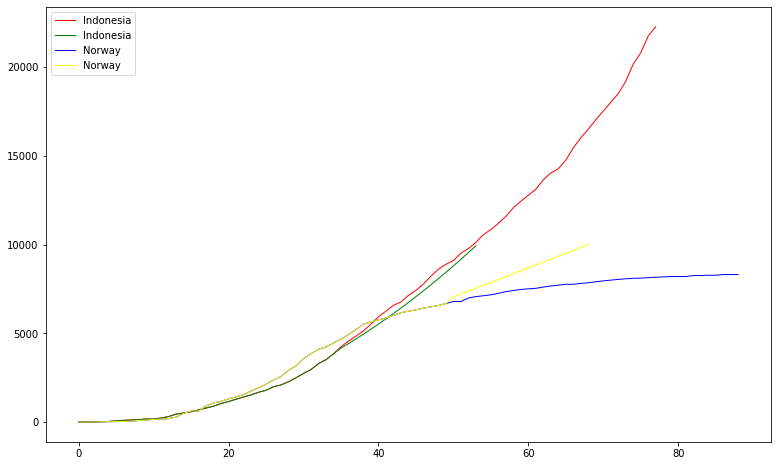

In [5]:
import matplotlib.pyplot as plot

df_predict_id = pd.read_csv('data_covid/prediction-ID-2')
df_predict_no = pd.read_csv('data_covid/prediction-NO-1')
df_predict_us = pd.read_csv('data_covid/prediction-US-2')
df_predict_uk = pd.read_csv('data_covid/prediction-UK-2')
df_predict_it = pd.read_csv('data_covid/prediction-IT-2')
df_predict_de = pd.read_csv('data_covid/prediction-DE-2')

x_indonesia = dfcovid_indonesia.index
y_indonesia = dfcovid_indonesia.total_cases_to_date
x_indonesia_pred = df_predict_id.x
y_indonesia_pred = df_predict_id.y

x_norway = dfcovid_norway.index
y_norway = dfcovid_norway.total_cases_to_date
x_norway_pred = df_predict_no.x
y_norway_pred = df_predict_no.y

# x_uk = dfcovid_uk.index
# y_uk = dfcovid_uk.total_cases_to_date

# x_us = dfcovid_us.index
# y_us = dfcovid_us.total_cases_to_date

# x_germany = dfcovid_germany.index
# y_germany = dfcovid_germany.total_cases_to_date

# x_china = dfcovid_china.index
# y_china = dfcovid_china.total_cases_to_date

# x_france = dfcovid_france.index
# y_france = dfcovid_france.total_cases_to_date

# x_italy = dfcovid_italy.index
# y_italy = dfcovid_italy.total_cases_to_date

# x_belgium = dfcovid_belgium.index
# y_belgium = dfcovid_belgium.total_cases_to_date

plot.figure(figsize=(13, 8))

# plot.scatter(x_indonesia, y_indonesia, c='r', label='Indonesia')
# plot.scatter(x_norway, y_norway, c='b', label='Norway')
# plot.scatter(x_uk, y_uk, c='y', label='UK')
# plot.scatter(x_us, y_us, c='g', label='US')

plot.plot(x_indonesia, y_indonesia, color='red', linewidth=1, label='Indonesia')
plot.plot(x_indonesia_pred, y_indonesia_pred, color='green', linewidth=1, label='Indonesia')

plot.plot(x_norway, y_norway, color='blue', linewidth=1, label='Norway')
plot.plot(x_norway_pred, y_norway_pred, color='yellow', linewidth=1, label='Norway')

# plot.plot(x_belgium, y_belgium, color='yellow', linewidth=1, label='Belgium')
# plot.plot(x_uk, y_uk, color='yellow', linewidth=1, label='UK')
# plot.plot(x_us, y_us, color='green', linewidth=1, label='US')
# plot.plot(x_germany, y_germany, color='blue', linewidth=1, label='Germany')
# plot.plot(x_france, y_france, color='red', linewidth=1, label='France')
# plot.plot(x_italy, y_italy, color='black', linewidth=1, label='Italy')
# plot.plot(x_southkorea, y_southkorea, color='brown', linewidth=1, label='South Korea')

plot.legend(loc='upper left')
plot.show()